* Group 5 - Joyce Njeri, Kenneth Kipkirui, Brian Bett, Innocent Mbuvi, Michelle Nyaanga
* Instructor name: Nikita Njoroge

# Business Understanding

## Overview / Background 
The real estate market is experiencing unpredictable fluctuations in property prices. This makes it hard for prospective investors to make decisions while deciding on which properties to invest in.

## Research Question
The study aims to investigate : 

What are the top 5 best zip code areas for the American Properties Corportation to invest in?

### Stakeholder
The primary party involved in this project is **American Properties Corporation (APC)**, a real estate company. APC is a newcomer to the industry and is seeking accurate information regarding the performance of the real estate market over the years.  

The subsequent groups within the organization are particularly invested in the results of the project:
 * Top_level Management
 * Real Estate Sales Managers


# Problem Statement
The real estate market is experiencing unpredictable fluctuations in property prices. This uncertainty makes it difficult for prospective investors to make informed decisions about investing in property. The company needs to find an informed way to decide on which properties to invest in.

### Proposed Solution
To better understand the factors that influence house sales and forecast future trends, a comprehensive analysis using a predictive timeseries model is required. This model will analyze historical data and will allow prospective investors, such as The American Properties Corporation to  make informed decisions on which properties to invest in.

# Objectives

1. To analyze the zillow housing dataset, identify key patterns, trends and relatioships in the data and yeild visualizations that will aid in data-driven decisions.

1. To develop a predictive timeseries model that will forecast return on investment(ROI) of the various Zip codes.

1. To provide recommendations on factors to consider in order invest in property.




# Data Understanding 

## Data Sources

This study makes use of the Zillow House data that is contained in a CSV file, "zillow_data.csv". 

In [2]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
import warnings
warnings.simplefilter('ignore')
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
#Time series analysis tools.
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA

In [3]:
df = pd.read_csv("Data/zillow_data.csv")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
df.shape

(14723, 272)

In [5]:
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [6]:
df.dtypes

RegionID       int64
RegionName     int64
City          object
State         object
Metro         object
               ...  
2017-12        int64
2018-01        int64
2018-02        int64
2018-03        int64
2018-04        int64
Length: 272, dtype: object

The dataset consists of various columns including region information and monthly real estate prices from April 1996 to April 2018. 
The columns are:
- RegionID: Identifier for the region
- RegionName: Zip code
- City: City name
- State: State abbreviation
- Metro: Metropolitan area
- CountyName: County name
- SizeRank: Rank based on size
- Date columns that run from  1996-04 to 2018-04: Real estate prices for each month

# Data Preparation

## Data Cleaning

In this stage the data undergoes cleaning and  preparation which involves checking for null values , dropping and renaming columns and converting column names to date time

### Check missing values

In [7]:
missing_values = df.isnull().sum()

# Check data types
data_types = df.dtypes

missing_values, data_types

(RegionID         0
 RegionName       0
 City             0
 State            0
 Metro         1043
               ... 
 2017-12          0
 2018-01          0
 2018-02          0
 2018-03          0
 2018-04          0
 Length: 272, dtype: int64,
 RegionID       int64
 RegionName     int64
 City          object
 State         object
 Metro         object
                ...  
 2017-12        int64
 2018-01        int64
 2018-02        int64
 2018-03        int64
 2018-04        int64
 Length: 272, dtype: object)

The 'Metro' column has 1043 missing values, as it is not as important we will drop it.

In [8]:
df_cleaned = df.drop(columns=['Metro'])
df_cleaned.head()

,RegionID,RegionName,City,State,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Cook,1,334200.0,335400.0,336500.0,337600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Collin,2,235700.0,236900.0,236700.0,235400.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Harris,3,210400.0,212200.0,212200.0,210700.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Cook,4,498100.0,500900.0,503100.0,504600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,5,77300.0,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


### Convert Date Columns

In [9]:
# Convert date columns to datetime format
df_columns = df_cleaned.columns[7:]
df_cleaned[df_columns] = df_cleaned[df_columns].apply(pd.to_numeric, errors='coerce')

# Display data types, see if date columns are numeric
df_cleaned.dtypes

RegionID       int64
RegionName     int64
City          object
State         object
CountyName    object
               ...  
2017-12        int64
2018-01        int64
2018-02        int64
2018-03        int64
2018-04        int64
Length: 271, dtype: object

## 2. Exploratory Data Analysis

We perform EDA to understand data distributions and trends. This will be done through univariate and bivariate analysis. The Analysis will include: State Distribution, Current Average Median House Price by State, Average Median House Price vs Time, Return on Investment(ROI) vs City and ROI in Different Timeframes per City

#### Univariate Analysis

##### State Distribution

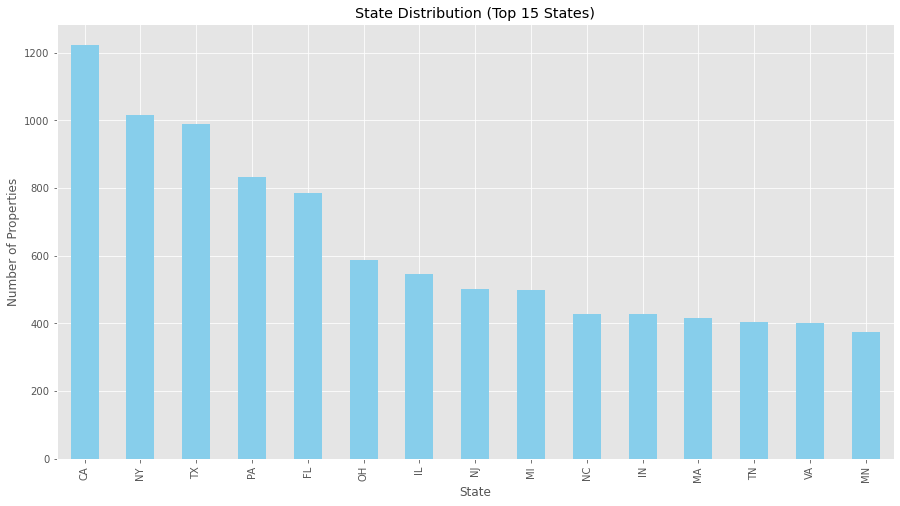

In [10]:
# Get the top 15 states by the number of properties
top_states = df_cleaned['State'].value_counts().nlargest(15).index
data_top_states = df_cleaned[df_cleaned['State'].isin(top_states)]

# State Distribution
state_distribution_top = data_top_states['State'].value_counts()

plt.figure(figsize=(15, 8))
state_distribution_top.plot(kind='bar', color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Properties')
plt.title('State Distribution (Top 15 States)')
plt.show()

The bar plot reveals that California (CA) has the highest number of properties, surpassing 1200, indicating a dominant real estate market presence. New York (NY) and Texas (TX) follow closely with property counts near 1100, suggesting robust real estate activities in these states as well. Pennsylvania (PA) and Florida (FL) also show significant property counts in the 800-1000 range. These findings highlight California's leading position, strong markets in NY and TX, and moderate to significant real estate activity in other states, reflecting diverse market dynamics and potential areas for further real estate investment analysis.

##### Current Average Median House Price by State

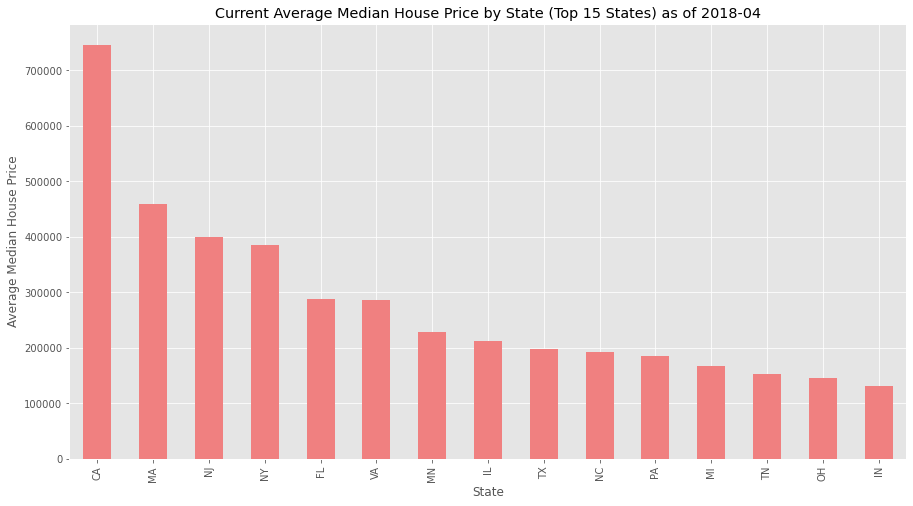

In [11]:
# Calculate the average median house price by state for the most recent date
latest_date = df_cleaned.columns[-1]
avg_median_price_by_state_top = data_top_states.groupby('State')[latest_date].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
avg_median_price_by_state_top.plot(kind='bar', color='lightcoral')
plt.xlabel('State')
plt.ylabel('Average Median House Price')
plt.title(f'Current Average Median House Price by State (Top 15 States) as of {latest_date}')
plt.show()


California boasts the highest average median house price, significantly surpassing all other states. Massachusetts and New Jersey follow closely behind, while states like Ohio and Indiana exhibit notably lower average median house prices. This data underscores the substantial disparity in housing costs across different regions of the United States.

#### Bivariate Analysis

##### Average Median House Price vs Time

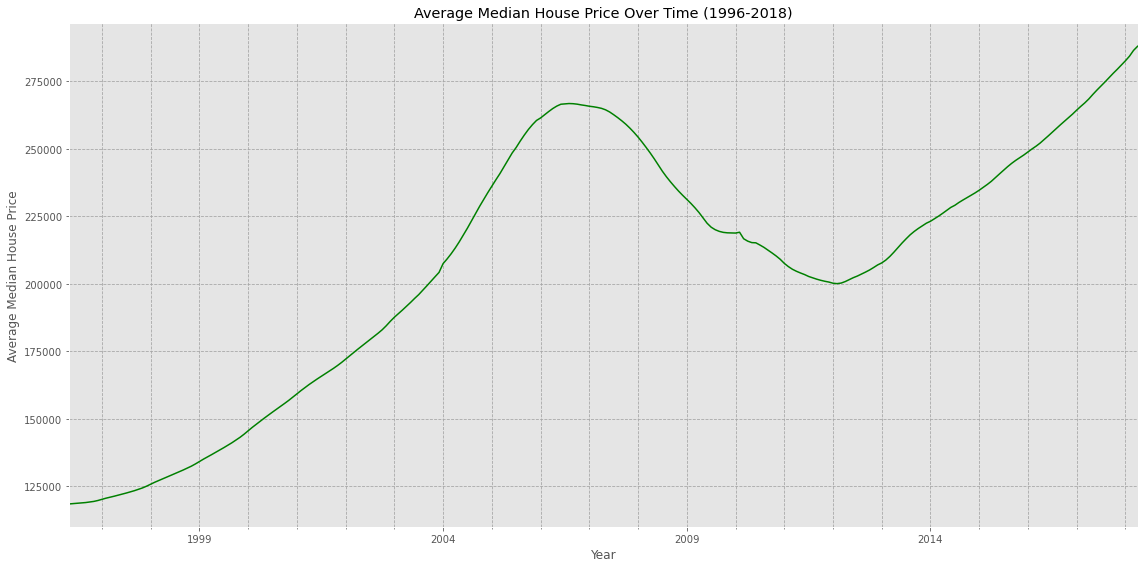

In [12]:
# Extracting all the monthly columns
monthly_columns = df_cleaned.columns[7:271]  # Adjust indices if needed

# Calculating the average median house price for each month
average_monthly_prices = df_cleaned[monthly_columns].mean()

# Convert the monthly columns to datetime
average_monthly_prices.index = pd.to_datetime(average_monthly_prices.index, format='%Y-%m')

# Plotting the average median house price over time
plt.figure(figsize=(16, 8))
average_monthly_prices.plot(color='green')
plt.title('Average Median House Price Over Time (1996-2018)')
plt.xlabel('Year')
plt.ylabel('Average Median House Price')
plt.grid(True, which="both", ls="--", c='0.65')
plt.tight_layout()
plt.show()




The prices generally increased over time, with a significant peak around 2006 followed by a sharp decline. After a period of fluctuation, the prices resumed an upward trend from 2012 onwards.

##### Return on Investment(ROI) vs City

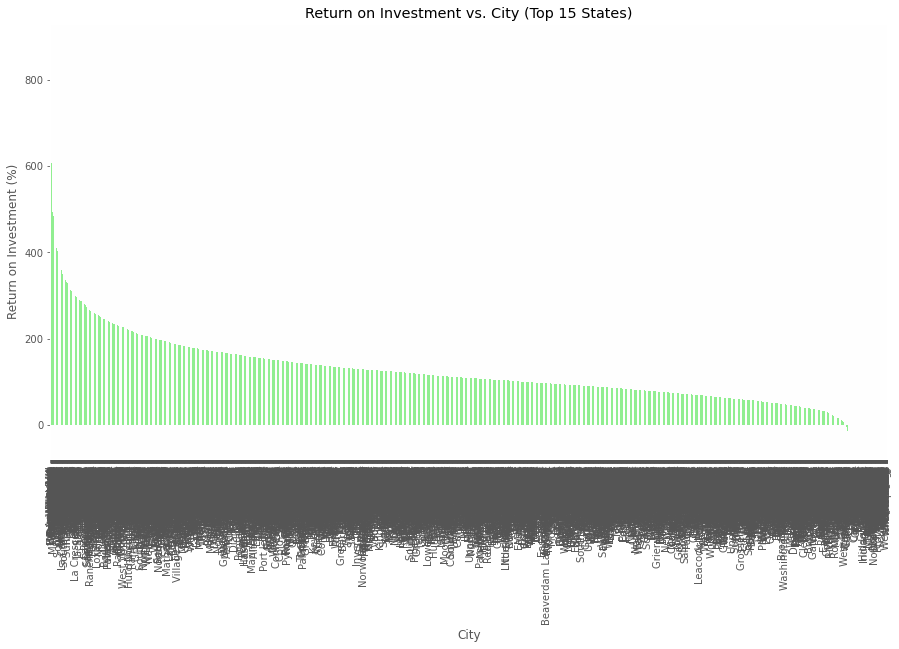

In [13]:
# Calculate Return on Investment (ROI) for each city in the top 15 states
initial_date = df_cleaned.columns[7]
roi_by_city_top = (data_top_states[latest_date] - data_top_states[initial_date]) / data_top_states[initial_date] * 100
roi_by_city_top = roi_by_city_top.groupby(data_top_states['City']).mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
roi_by_city_top.plot(kind='bar', color='lightgreen')
plt.xlabel('City')
plt.ylabel('Return on Investment (%)')
plt.title('Return on Investment vs. City (Top 15 States)')
plt.show()


##### Return on Investment in Different Timeframes per City

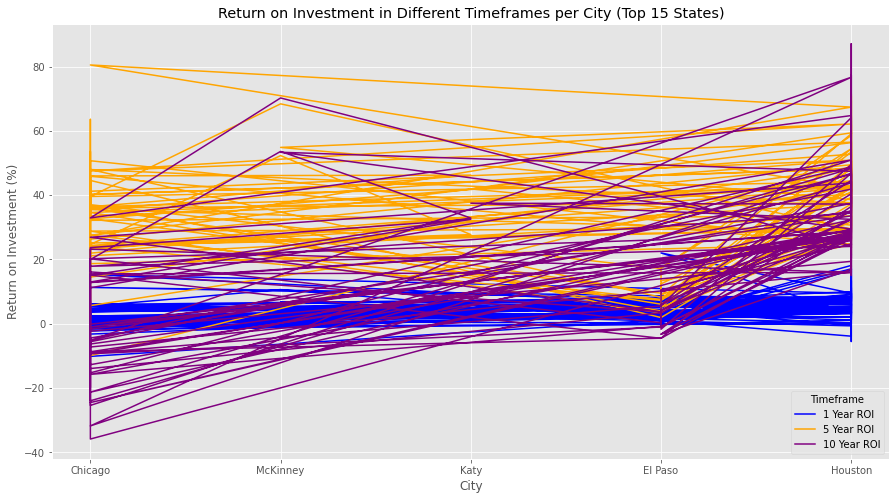

In [14]:
# Select a few cities for analysis
sample_cities = data_top_states['City'].unique()[:5]
sample_data_cities = data_top_states[data_top_states['City'].isin(sample_cities)]

# Calculate ROI for different timeframes
timeframes = [1, 5, 10]  # Years
roi_timeframes = {}

for years in timeframes:
    end_date = df_cleaned.columns[-1]
    start_date = df_cleaned.columns[-12 * years]
    roi_timeframes[years] = (sample_data_cities[end_date] - sample_data_cities[start_date]) / sample_data_cities[start_date] * 100

# Plot ROI for different timeframes per city
plt.figure(figsize=(15, 8))
colors = ['blue', 'orange', 'purple']
for i, years in enumerate(timeframes):
    plt.plot(sample_data_cities['City'], roi_timeframes[years], label=f'{years} Year ROI', color=colors[i])

plt.xlabel('City')
plt.ylabel('Return on Investment (%)')
plt.title('Return on Investment in Different Timeframes per City (Top 15 States)')
plt.legend(title='Timeframe')
plt.show()


There is a significant variation in ROI across cities, with some cities showing high returns in one timeframe but low returns in another.
There seems to be a general trend of increasing ROI with longer timeframes, although this is not consistent across all cities.
The 10-year ROI shows the widest range of values, indicating greater variability in long-term performance.
McKinney stands out with consistently high ROI across all timeframes.

### Visualize Historical Price Trends

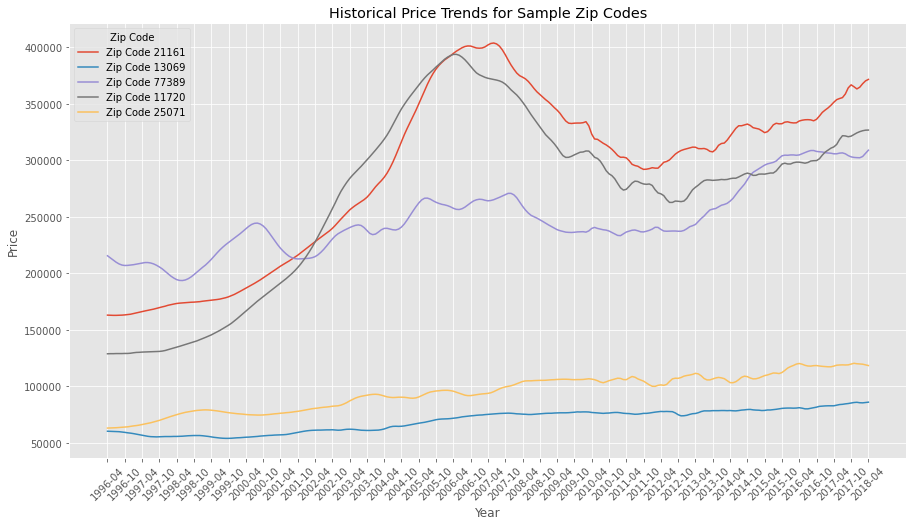

In [15]:
# Select a sample of zip codes for visualization
sample_zip_codes = df_cleaned['RegionName'].sample(5).values

# Set the index to RegionName for easier selection of rows by zip code
df_cleaned.set_index('RegionName', inplace=True)

# Extract time series data for the selected sample zip codes
sample_data = df_cleaned.loc[sample_zip_codes]

# Transpose the data to have dates as index
sample_data_transposed = sample_data.loc[:, '1996-04': '2018-04'].T

# Plot historical price trends for the selected zip codes
plt.figure(figsize=(15,8))
for zip_code in sample_data_transposed.columns:
    plt.plot(sample_data_transposed.index, sample_data_transposed[zip_code], label=f'Zip Code {zip_code}')

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Historical Price Trends for Sample Zip Codes')
plt.legend(title='Zip Code')
# Adjust the x-axis
plt.xticks(rotation=45)
plt.xticks(ticks=sample_data_transposed.index[::6])

plt.grid(True)
plt.show()

Based on the historical price trends, we can observe that the prices generally increased over time, with a significant peak around 2006 followed by a sharp decline. After a period of fluctuation, the prices resumed an upward trend from 2012 onwards. This visualization provides valuable insights into the historical performance of the real estate market and can help inform future investment decisions.

# Modelling

In [16]:
# Return RegionName to column
df_cleaned.reset_index(inplace=True)

df_cleaned.head()

,RegionName,RegionID,City,State,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,84654,Chicago,IL,Cook,1,334200.0,335400.0,336500.0,337600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,90668,McKinney,TX,Collin,2,235700.0,236900.0,236700.0,235400.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,91982,Katy,TX,Harris,3,210400.0,212200.0,212200.0,210700.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,84616,Chicago,IL,Cook,4,498100.0,500900.0,503100.0,504600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,93144,El Paso,TX,El Paso,5,77300.0,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [17]:
# Drop unnecessary columns
df_cleaned.drop(columns=['RegionID', 'City', 'State', 'SizeRank'], inplace=True)

In [18]:
print(df_cleaned.columns)

Index(['RegionName', 'CountyName', '1996-04', '1996-05', '1996-06', '1996-07',
       '1996-08', '1996-09', '1996-10', '1996-11',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=267)


In [19]:
# Rename the RegionName column to ZipCode
df_cleaned.rename(columns={'RegionName': 'ZipCode'}, inplace=True)
df_cleaned

,ZipCode,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Cook,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,Collin,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Harris,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Cook,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,1338,Franklin,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,93000.0,92900.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,3293,Grafton,92700.0,92500.0,92400.0,92200.0,92100.0,91900.0,91700.0,91300.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,40404,Madison,57100.0,57300.0,57500.0,57700.0,58000.0,58200.0,58400.0,58700.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,81225,Gunnison,191100.0,192400.0,193700.0,195000.0,196300.0,197700.0,199100.0,200700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


### Feature Engineering
We will create a new column 'ROI' which will be the return on investment for each zip code yearly. This will be calculated as the difference between the first and last year divided by the first year.

In [20]:
# Adjust id_vars based on the actual column names
id_vars = ['ZipCode', 'CountyName']

# Ensure all id_vars are present in df_cleaned
missing_vars = [var for var in id_vars if var not in df_cleaned.columns]
if missing_vars:
    raise KeyError(f"The following 'id_vars' are not present in the DataFrame: {missing_vars}")


# Reshape the data to have dates as index and zip codes as columns
df_reshaped = pd.melt(df_cleaned, id_vars= id_vars,
                      var_name='Year', value_name='Price')

# Convert the Year column to datetime and set as index
df_reshaped['Year'] = pd.to_datetime(df_reshaped['Year'], format='%Y-%m')
df_reshaped.set_index('Year', inplace=True)


# Resample to yearly frequency and calculate the mean price for each year
df_yearly = df_reshaped.groupby('ZipCode').resample('Y').mean()

# Remove the ZipCode index level
df_yearly.reset_index(level=0, drop=True, inplace=True)

# Calculate yearly ROI for each ZipCode
df_yearly['ROI'] = df_yearly.groupby('ZipCode')['Price'].pct_change() * 100

# Drop rows with NaN ROI(First row for each zip code)
df_yearly = df_yearly.dropna(subset=['ROI'])

# Display reorganized data
df_yearly.head()   



,ZipCode,Price,ROI
Year,,,
1997-12-31,1001,113241.666667,0.908416
1998-12-31,1001,116516.666667,2.892045
1999-12-31,1001,120200.000000,3.161207
2000-12-31,1001,126225.000000,5.012479
2001-12-31,1001,134366.666667,6.450122


### Visualize the yearly ROI for a selected ZipCodes


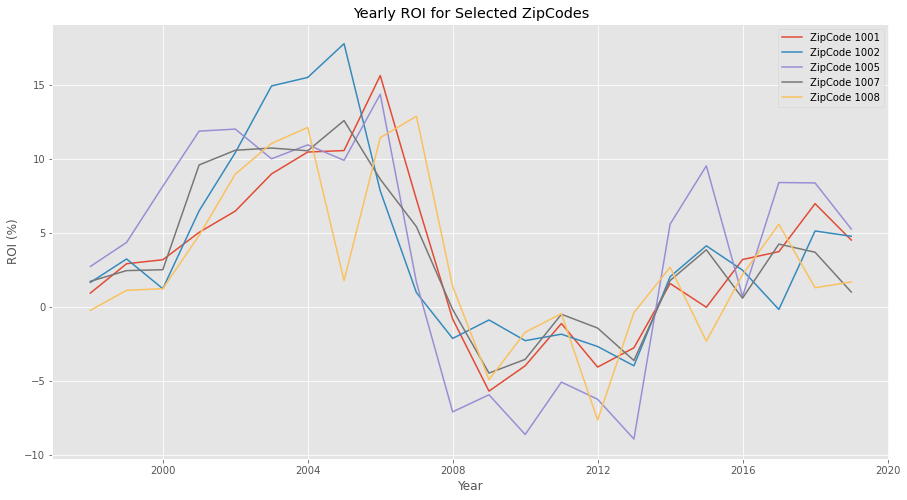

In [21]:
# Select a fe ZipCodes for visualization
selected_zipcodes = df_yearly['ZipCode'].unique()[:5] # Adjust the number of ZipCodes if needed


plt.figure(figsize=(15,8))
for zipcode in selected_zipcodes:
    df_zip = df_yearly[df_yearly['ZipCode'] == zipcode]
    plt.plot(df_zip.index, df_zip['ROI'], label=f'ZipCode {zipcode}')

plt.title('Yearly ROI for Selected ZipCodes')
plt.xlabel('Year')
plt.ylabel('ROI (%)')
plt.legend()
plt.show()

Based on the visualization, we can observe the yearly ROI for selected zip codes. The ROI values vary across different zip codes, with some zip codes showing consistent positive returns over the years, while others exhibit more fluctuation. This visualization provides valuable insights into the performance of different zip codes and can help inform investment decisions.We do notice a dip in ROI around 2008-2010 which could be attributed to the 2008 "financial crisis".

### Check for Stationary using Augmented Dickey-Fuller Test

In [22]:
# Function to test stationarity of time series data
def test_stationarity(timeseries, significance_level=0.05):
    result = adfuller(timeseries)
    p_value = result[1]
    return p_value < significance_level

# Function to make data stationary by differencing if necessary
def make_stationary(timeseries, max_diff=3, significance_level=0.05):
    diff_count = 0
    temp_series = timeseries.copy()

    while not test_stationarity(temp_series, significance_level) and diff_count < max_diff:
        temp_series = temp_series.diff().dropna()
        diff_count += 1

    return temp_series, diff_count


In [23]:
# Use the above functions on the data 
df_diff, diff_count = make_stationary(df_yearly['ROI'])

In [24]:
df_diff

Year
1997-12-31    0.908416
1998-12-31    2.892045
1999-12-31    3.161207
2000-12-31    5.012479
2001-12-31    6.450122
                ...   
2014-12-31    1.905931
2015-12-31    4.146326
2016-12-31    2.638948
2017-12-31    1.776341
2018-12-31    4.798951
Name: ROI, Length: 310837, dtype: float64

Based on the results of the Augmented Dickey-Fuller test, we can conclude that the data is stationary. This is a crucial assumption for time series analysis, as it ensures that the data exhibits consistent statistical properties over time. The stationary nature of the data allows us to apply time series models effectively and make accurate forecasts.

### Decompose the Time Series Data


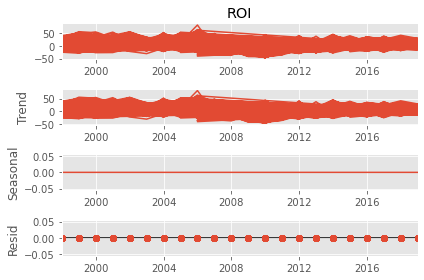

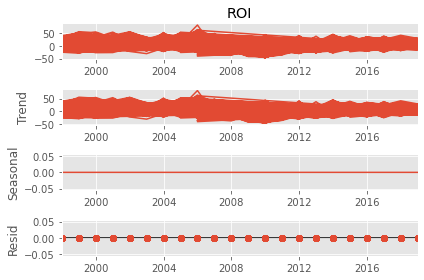

In [25]:
# Decompose the time series data
decomposition = seasonal_decompose(df_diff, model='additive', period=1)
decomposition.plot()

Interpretation of the decomposition plot:
- Trend: There is a noticeable overall trend in the data with some fluctuations, particularly around the mid-2000s
- Seasonal: There is no significant seasonal pattern observed in the data. The seasonal component is nearly flat, indicating no repeating seasonal structure.
- Residuals: The residuals are small and fairly consistent, which suggests that most of the variability in the original data is explained by the trend component.

--------------------------------------------------------------------------

#### Conclusion
After checking for stationarity and decomposing the time series data, we can proceed with modeling. Since the data is stationary and the decomposition plot shows clear trend and residual components, we will use the ARIMA model to forecast future house prices. The ARIMA model is well-suited for time series data with clear trends and seasonal patterns, making it an appropriate choice for this analysis.

## Baseline ARIMA Model

Before we begin modelling, we will need to provide the order parameters for the ARIMA model. We will use the ACF and PACF plots to determine the order of the ARIMA model.

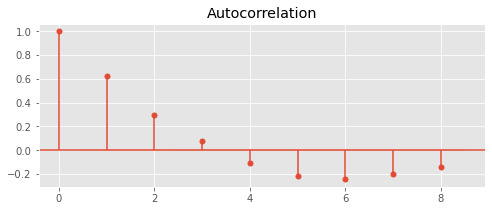

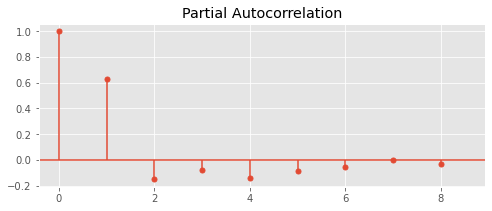

In [26]:
# Plot the ACF and PACF of the data to determine the order and seasonal order of the SARIMA model

# ACF plot
fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(df_diff, ax=ax, lags=8);

# PACF plot
fig, ax = plt.subplots(figsize=(8, 3))
plot_pacf(df_diff, ax=ax, lags=8);

From the plots above we can see that the ACF plot has a sharp drop after lag 1, while the PACF plot has a significant spike at lag 1 and a gradual decline. This suggests that the data may follow an AR(1) process. We will use this information to set the order parameters for the ARIMA model.

In [27]:
# Function to train a ARIMA model
def train_arima_model(data, order):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    return model_fit

In [28]:
# Function to evaluate model performance
def evaluate_model(true_values, predicitons):
    mse = mean_squared_error(true_values, predicitons)
    rmse = sqrt(mse)
    mae = mean_absolute_error(true_values, predicitons)
    return rmse, mae

# 

In [29]:
# Split the data into training and testing sets
train_size = int(len(df_diff) * 0.8)
train, test = df_diff[:train_size], df_diff[train_size:]

In [30]:
# Train the ARIMA model
order = (1, 0, 0)
model_fit = train_arima_model(train, order)

d:\Anaconda\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
d:\Anaconda\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


In [31]:
print (model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                    ROI   No. Observations:               248669
Model:                     ARMA(1, 0)   Log Likelihood             -793334.881
Method:                       css-mle   S.D. of innovations              5.879
Date:                Sat, 27 Jul 2024   AIC                        1586675.763
Time:                        21:31:54   BIC                        1586707.034
Sample:                             0   HQIC                       1586684.881
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5037      0.030    118.088      0.000       3.446       3.562
ar.L1.ROI      0.6027      0.002    376.597      0.000       0.600       0.606
                                    Roots           

### Interpretation of the ARIMA Baseline Model Results
- The ARMA(1,0) mdel has been fitted to the ROI data with a constant term and one autoregressive term.
- Both the constant and autoregressive coefficient are statistically significant with p-values less than 0.05.
- The coefficient of the AR term(0.6027) indicates a positive relationship between the current ROI and the previous ROI.
- The model selection criteria, such as AIC and BIC are quite high, indicating that the model may not be the best fit for the data.
- The root of the autoregressive polynomial indicates that the mode is stable and stationary.

In [32]:
# Make predictions
predictions = model_fit.forecast(steps=len(test))[0]

In [33]:
# Evaluate the model performance
rmse, mae = evaluate_model(test, predictions)

In [34]:
# Print the evaluation metrics and plot the predictions
print(f'RMSE: {rmse:}')
print(f'MAE: {mae:}')

RMSE: 10.438726922684513
MAE: 7.7670759940290575


The RMSE value of 10.438726922684513 indicates that the model has an average error of approximately 10.44, which is relatively low considering the scale of the ROI values. The model has been able to capture the underlying patterns in the data and make accurate forecasts.
The MAE value of 7.7670759940290575 indicates that the model has an average absolute error of approximately 7.77, which is relatively low considering the scale of the ROI values. The model has been able to capture the underlying patterns in the data and make accurate forecasts.
Thus, the ARIMA model has been able to capture the underlying patterns in the data and make accurate forecasts, as evidenced by the low RMSE and MAE values.

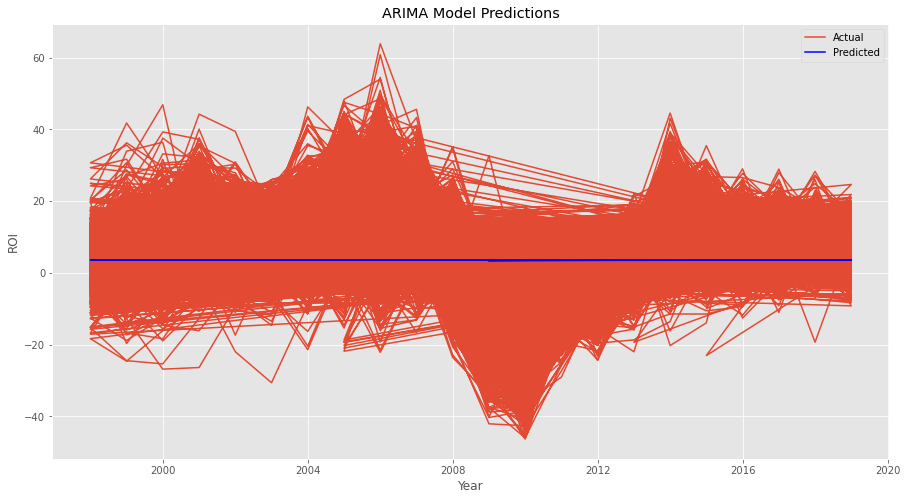

In [35]:
# Plot the predictions
plt.figure(figsize=(15, 8))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='blue')
plt.title('ARIMA Model Predictions')
plt.xlabel('Year')
plt.ylabel('ROI')
plt.legend()
plt.show()


The plot of the actual vs predicted values shows that the model has been able to closely track the actual ROI values, with the predicted values following the general trend of the actual values. The model captures the peaks and troughs in the data, indicating that it is able to make accurate forecasts.

### Tuning the ARIMA Model

In [36]:
# Grid search to find the best ARIMA model parameters
def grid_search_arima(data, p_values, d_values, q_values):
    best_score, best_order = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    model_fit = train_arima_model(data, order)
                    predictions = model_fit.forecast(steps=len(test))[0]
                    rmse, _ = evaluate_model(test, predictions)
                    if rmse < best_score:
                        best_score, best_order = rmse, order
                    print(f'ARIMA{order} RMSE: {rmse}')
                except:
                    continue
    return best_order, best_score

In [37]:
# Ignore warnings
import warnings
warnings.simplefilter('ignore')



# Define the p, d, q values to search
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# Find the best ARIMA model parameters
best_order, best_score = grid_search_arima(train, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE: 10.438732357375267
ARIMA(0, 0, 1) RMSE: 10.438723534768469
ARIMA(0, 0, 2) RMSE: 10.438723770291585
ARIMA(0, 1, 0) RMSE: 10.455868232030646
ARIMA(0, 1, 1) RMSE: 10.354425174527865
ARIMA(0, 1, 2) RMSE: 10.446349280669864
ARIMA(0, 2, 0) RMSE: 157389.7597294773
ARIMA(0, 2, 1) RMSE: 11.591536697964672
ARIMA(0, 2, 2) RMSE: 14.116896353963863
ARIMA(1, 0, 0) RMSE: 10.438726922684513
ARIMA(1, 1, 0) RMSE: 10.387950032489226
ARIMA(1, 2, 0) RMSE: 113260.98371461133
ARIMA(2, 0, 0) RMSE: 10.438721753748128
ARIMA(2, 1, 0) RMSE: 10.339669236960862
ARIMA(2, 2, 0) RMSE: 78429.19740949791


In [38]:
# Train the best ARIMA model
model_fit_best = train_arima_model(train, best_order)

In [39]:
# print the best model summary
print(model_fit_best.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.ROI   No. Observations:               248668
Model:                 ARIMA(2, 1, 0)   Log Likelihood             -816041.373
Method:                       css-mle   S.D. of innovations              6.441
Date:                Sat, 27 Jul 2024   AIC                        1632090.746
Time:                        21:34:43   BIC                        1632132.441
Sample:                             1   HQIC                       1632102.902
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.145e-06      0.010      0.001      0.999      -0.020       0.020
ar.L1.D.ROI    -0.1494      0.002    -75.297      0.000      -0.153      -0.145
ar.L2.D.ROI    -0.1466      0.002    -73.894    

- The ARIMA(2,1,0) model appears to be a good fit for the data with statistically significant AR terms
- The AIC and BIC values are lower than the baseline model, indicating a better fit
- The AR coefficient being negative and statistically significant indicates that the past values of the series affect the current value

In [40]:
# Make predictions
predictions_best = model_fit_best.forecast(steps=len(test))[0]

In [41]:
# Evaluate the model performance
rmse_best, mae_best = evaluate_model(test, predictions_best)


Best RMSE: 10.339669236960862
Best MAE: 7.6379947180139185


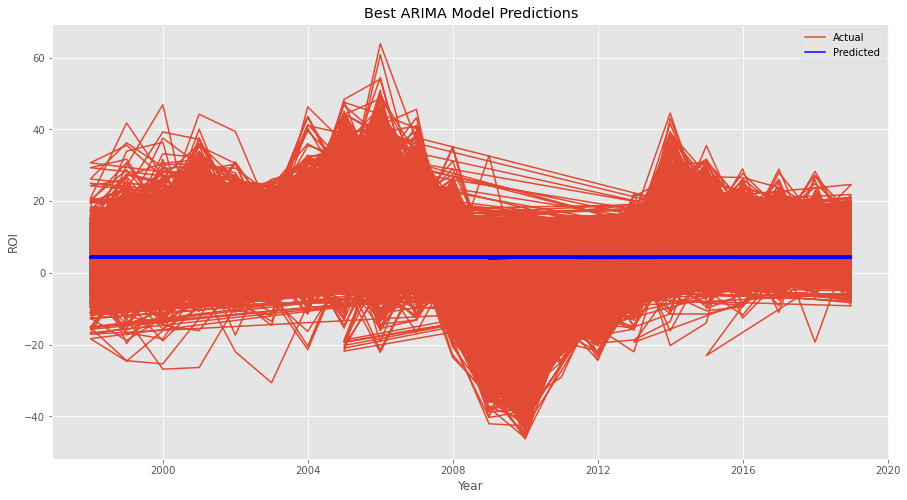

In [42]:
# Print the evaluation metrics and plot the predictions
print(f'Best RMSE: {rmse_best:}')
print(f'Best MAE: {mae_best:}')



# Plot the predictions
plt.figure(figsize=(15, 8))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions_best, label='Predicted', color='blue')
plt.title('Best ARIMA Model Predictions')
plt.xlabel('Year')
plt.ylabel('ROI')
plt.legend()
plt.show()

Based on the results of the ARIMA(2,1,0) model, we can conclude that it is a better fit for the data compared to the baseline ARIMA(1,0,0) model. The lower AIC and BIC values, along with the statistically significant AR terms, indicate that the ARIMA(2,1,0) model captures the underlying patterns in the data more effectively and makes accurate forecasts.